# Perturbation for RED20 GFP - Fig S13

In [1]:
%%time
%load_ext autoreload

from analysis_utils import *
from joblib import Parallel, delayed
import multiprocessing  
import numpy as np
import pandas as pd

#Growth rate = 3.0
#Computes the translation latencies from our model with simulations containing
#1 to 14 cognate ternary complexes in the voxel (14 to 42 not included because
#the probability of voxels with that number of cognates is ~0)
path = "./data/"
ensmbl_latency_dict = dict()
rxndiff=dict()
scalingFactor = 200
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}

data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data,100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))

data = "191105_0908/"
for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))
    
#Experimentally obtained codon usage frequencies and tRNA abundances at growth rate = 2.5 dbl/hr
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 8.4 s, sys: 2.7 s, total: 11.1 s
Wall time: 8.53 s


# Load original GA RED20-GFP distributions

/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


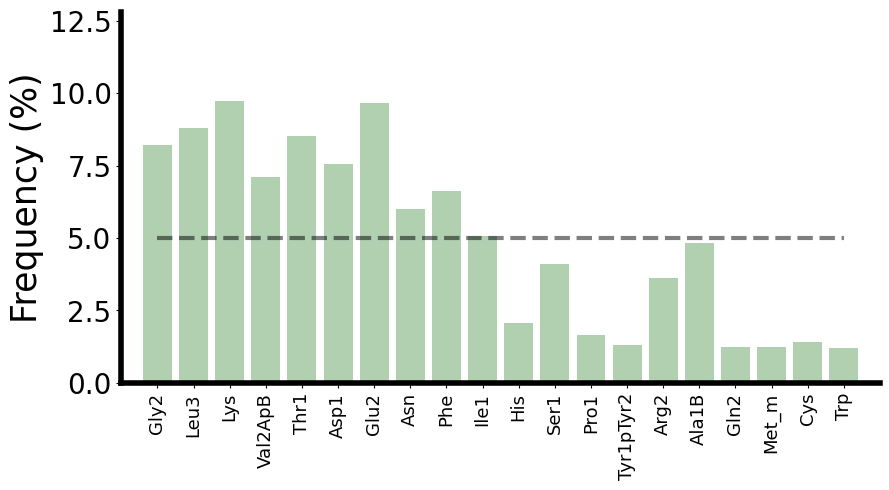

In [2]:
tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

#Loading GA fast and slow RED20-GFP distributions
import pickle
with open(r"./tRNA_distributions-GFP.pickle", "rb") as input_file:
    e = pickle.load(input_file)
e.keys()

#pCodon and ptRNA setup
gene_map, pCodon_GFP = singlegene_to_genemap('./data/tables/sfGFP_RED20.csv')
ptRNA_red20 = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20 = ptRNA_red20[6]/sum(ptRNA_red20[6])
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(ptRNA_red20,pCodon_GFP,extra2=True)

#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
ptRNA_sorted = gr25_ptRNA[tRNA_sorted_indices]

ptRNA_sorted=np.delete(ptRNA_sorted,5)
ptRNA_sorted=np.delete(ptRNA_sorted,12)
tRNA_sorted=np.delete(tRNA_sorted,5)
tRNA_sorted=np.delete(tRNA_sorted,12)

#Resort ptRNA_min and plot
GA_fast_values =np.array(list(e['GFP_gafast'][1].values()))
ptRNA_min_dict = dict(zip(tRNA_tags,GA_fast_values))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]

fig,ax = plt.subplots(figsize=(9,5))
ax.bar(np.arange(20),np.array(ptRNA_min_sorted)[0:20]*100,color='darkseagreen',width=0.8,alpha=0.7)
ax.plot(np.arange(20),[1/20*100]*20,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(np.arange(20), np.array(tRNA_sorted)[0:20],rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-1,20)
ax.set_ylabel('Frequency (%)',fontsize=25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=13)
ax.set_ylim(0,12.8)

plt.tight_layout()
fig.savefig('./Figures/S13a.svg', dpi=300,bbox_inches='tight')

# Generate Datasets -- run to generate data for the first time

## Generate corresponding pCodon list


In [3]:
%%time
ensmbl_latency_dict_list = np.load('./data/ensmbl_latency_dict_list10.npy',allow_pickle=True)

pCodon_RED20GFP_list = []
for i,ensmbl_latency_dict in enumerate(ensmbl_latency_dict_list):
    print(i)
    gene_map, pCodon_GFP = singlegene_to_genemap('./data/tables/sfGFP_RED20.csv')
    ptRNA_red20 = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
    ptRNA_red20 = ptRNA_red20[6]/sum(ptRNA_red20[6])
    ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(ptRNA_red20,pCodon_GFP,extra2=True)
    pCodon_RED20GFP_list.append(pCodon)
np.save('./data/pCodon_RED20GFP_list10',pCodon_RED20GFP_list)

/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


0
1
2
3
4
5
6
7
8
9
CPU times: user 416 ms, sys: 9.05 ms, total: 425 ms
Wall time: 141 ms


/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supp

## Generate baseline distribution

In [4]:
%%time
baseline = perturb(GA_fast_values, tRNA_tags, np.array(tRNA_sorted)[0:20],pCodon,ensmbl_latency_dict,1,0,pCodon_type='RED20GFP',RED20=True)
np.save('./data/RED20GFP-SinglePerturb_n10m300_baseline_elongt',baseline[0])
np.save('./data/RED20GFP-SinglePerturb_n10m300_baseline_ptRNA_sorted',baseline[1])
np.save('./data/RED20GFP-SinglePerturb_n10m300_baseline_elongt_sem',baseline[2])

replicates run:  3000
CPU times: user 29.2 s, sys: 760 ms, total: 30 s
Wall time: 1min 59s


## Single perturbation pairwise analysis of each of the 20 tRNA

Takes in the original fastest performing tRNA distribution, then goes in codon-abundance weighted tRNA rank order starting from the second most-weighted tRNA doing the following:
1. If the given tRNA has more relative abundance than the immediately previous higher rank order bar (e.g., first tRNA if we're currently evaluating the second tRNA), then set the relative abundance to be 10% lower than the previous bar and add the removed relative abundance to the previous bar.
2. Evaluate the updated elongation latency
3. Reset to the original fastest distribution and go to the next tRNA


In [5]:
elongt_perturb = []
ptRNA_perturb = []
elongt_perturb_sem = []
baseline_elongt = np.load('./data/RED20GFP-SinglePerturb_n10m300_baseline_elongt.npy')

for i in range(1,len(tRNA_sorted[0:20])):
    values = perturb(GA_fast_values, tRNA_tags, np.array(tRNA_sorted)[0:20],pCodon,ensmbl_latency_dict,i,10,pCodon_type='RED20GFP',RED20=True)
    elongt_perturb.append(values[0])
    ptRNA_perturb.append(values[1])
    elongt_perturb_sem.append(values[2])

ptRNA_dict = dict(zip(tRNA_tags,ptRNA_perturb[1]))
ptRNA_sorted_perturb =[ptRNA_dict[tRNA] for tRNA in tRNA_sorted]
print(ptRNA_sorted_perturb)

np.save('./data/RED20GFP-SinglePerturb_n10m300_ptRNA_sorted_perturb',ptRNA_sorted_perturb)
np.save('./data/RED20GFP-SinglePerturb_n10m300_elongt_perturb',elongt_perturb)
np.save('./data/RED20GFP-SinglePerturb_n10m300_elongt_perturb_sem',elongt_perturb_sem)

replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
[0.08207273693853659, 0.09714887016803621, 0.08824973702287257, 0.07091250645697382, 0.08520426515877168, 0.0754751853552089, 0.09676048713507972, 0.059981364885348526, 0.06622090069588156, 0.05074935073554299, 0.020539831304472365, 0.04107876164977899, 0.016644118014926993, 0.013176498402154959, 0.03618178216935147, 0.048204638114246794, 0.012545073592836742, 0.012545073592836742, 0.014095078149276317, 0.012213740457866095, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## Monotonicity algorithm: multiple rounds of consecutive 40-tRNA perturbation analyses shifting abundance mass towards monotonicity.
Can also have a second version of this figure that doesn't touch copies of tRNA (e.g., Leu1, Leu3)


In [42]:
baseline_elongt = np.load('./data/RED20GFP-SinglePerturb_n10m300_baseline_elongt.npy')
baseline_ptRNA = np.load('./data/RED20GFP-SinglePerturb_n10m300_baseline_ptRNA_sorted.npy')

elongt_perturb = []
ptRNA_perturb = []
elongt_sem_perturb = []

ptRNA_min_update = GA_fast_values.copy()
mono_perturb = []
count=0

ptRNA_sorted_perturb_iter = baseline_ptRNA.copy()
print(ptRNA_min_update)

monotonic = False

values = perturb(ptRNA_min_update, tRNA_tags, np.array(tRNA_sorted)[0:20],pCodon,ensmbl_latency_dict,i,0,pCodon_type='RED20GFP',RED20=True)
ptRNA_dict = dict(zip(tRNA_tags,values[1]))
ptRNA_sorted_perturb_iter =[ptRNA_dict[tRNA] for tRNA in tRNA_sorted][0:20]
mono_perturb.append(monotonicity(ptRNA_sorted_perturb_iter,RED20=True))

elongt_perturb.append(baseline_elongt.item())
while (not monotonic):
    count+=1
    for i in range(1,20):
        if i==19:
            values = perturb(ptRNA_min_update, tRNA_tags, np.array(tRNA_sorted)[0:20],pCodon,ensmbl_latency_dict,i,10,pCodon_type='RED20GFP',RED20=True)
        else:
            values = perturb(ptRNA_min_update, tRNA_tags, np.array(tRNA_sorted)[0:20],pCodon,ensmbl_latency_dict,i,10,skip=True,pCodon_type='RED20GFP',RED20=True)
        ptRNA_min_update = values[1]
    elongt_perturb.append(values[0])
    elongt_sem_perturb.append(values[2])
    ptRNA_dict = dict(zip(tRNA_tags,values[1]))
    print(ptRNA_dict)
    ptRNA_sorted_perturb_iter =[ptRNA_dict[tRNA] for tRNA in tRNA_sorted][0:20]
    mono_perturb.append(monotonicity(ptRNA_sorted_perturb_iter,RED20=True))
    ptRNA_perturb.append(ptRNA_sorted_perturb_iter)
    print("iter: ", count, " monotonicity: ", monotonicity(ptRNA_sorted_perturb_iter,RED20=True), "elongt: ",elongt_perturb[-1] )
    if monotonicity(ptRNA_sorted_perturb_iter,RED20=True) == 100:
        monotonic = True
        
print(elongt_perturb)
print(elongt_perturb - baseline_elongt)

np.save('./data/RED20GFP-IterativeSequentialAdditive-Monotonicity_n10m300_ptRNA_perturb',ptRNA_perturb)
np.save('./data/RED20GFP-IterativeSequentialAdditive-Monotonicity_n10m300_elongt_perturb',elongt_perturb)
np.save('./data/RED20GFP-IterativeSequentialAdditive-Monotonicity_n10m300_elongt_perturb_sem',elongt_sem_perturb)
np.save('./data/RED20GFP-IterativeSequentialAdditive-Monotonicity_n10m300_mono_perturb',mono_perturb)

[0.04820464 0.         0.03618178 0.         0.         0.
 0.05998136 0.07547519 0.01409508 0.         0.01254507 0.09676049
 0.08207274 0.         0.02053983 0.05074935 0.         0.
 0.08796342 0.         0.         0.09743518 0.01254507 0.0662209
 0.01664412 0.         0.         0.         0.04107876 0.
 0.         0.         0.08520427 0.         0.         0.
 0.01221374 0.0131765  0.         0.07091251]
replicates run:  3000
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  3000
{'Ala1B': 0.02506722398113962, 'Ala2': 0.0, 'Arg2': 0.038852112223725144, 'Arg3': 0.0, 'Arg4': 0.0, 'Arg5': 0.0, 'Asn': 0.0697010938369941, 'Asp1': 0.08844957063938365, 'Cys': 0.014

In [41]:
mono_perturb

[52.63157894736842,
 (160.03079094791698,
  array([0.04820464, 0.        , 0.03618178, 0.        , 0.        ,
         0.        , 0.05998136, 0.07547519, 0.01378582, 0.        ,
         0.01254507, 0.09676049, 0.08207274, 0.        , 0.02053983,
         0.05074935, 0.        , 0.        , 0.08796342, 0.        ,
         0.        , 0.09743518, 0.01254507, 0.0662209 , 0.01664412,
         0.        , 0.        , 0.        , 0.04107876, 0.        ,
         0.        , 0.        , 0.08520427, 0.        , 0.        ,
         0.        , 0.012523  , 0.0131765 , 0.        , 0.07091251]),
  0.018908097795758205),
 68.42105263157895,
 84.21052631578947,
 94.73684210526315,
 100.0]

# Plotting (Can re-run below)

## Single perturbation analysis plot

show [0.         0.01075726 0.02320637 0.         0.02214568 0.01144316
 0.         0.         0.00802202 0.         0.07153485 0.0462397
 0.58059519 0.         0.00969345 0.01718268 0.14339752 0.03363297
 0.         0.02713277]


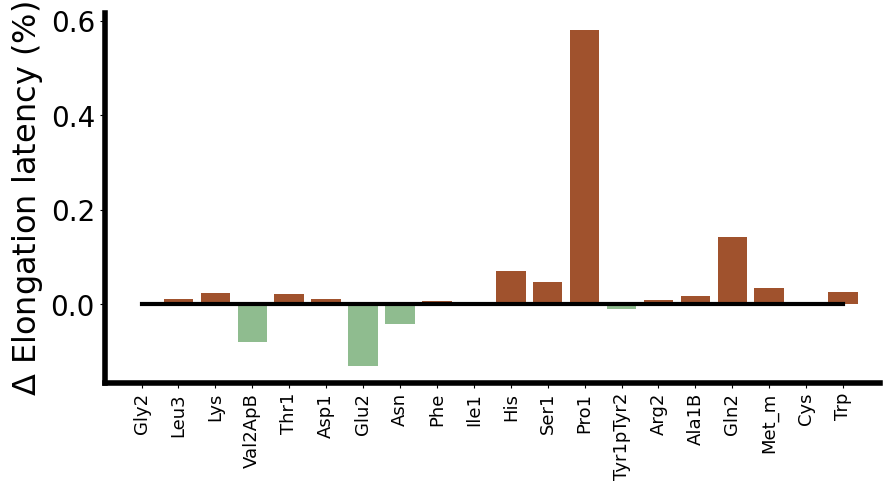

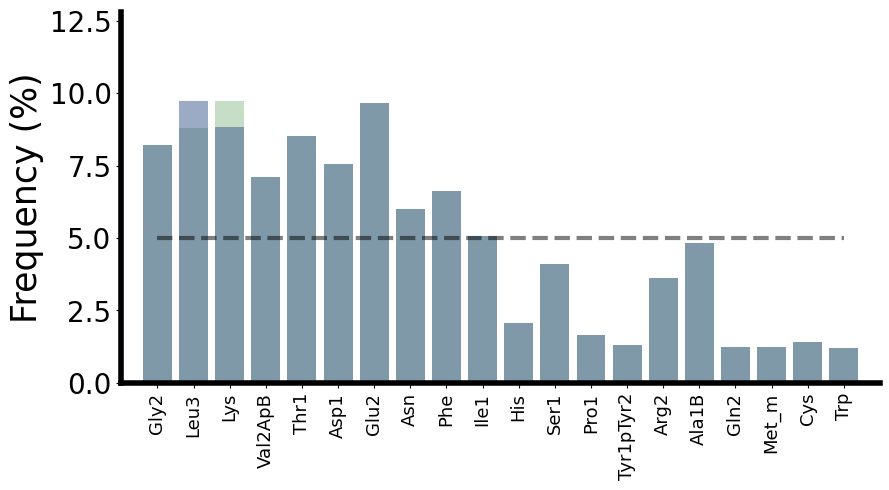

In [14]:
ptRNA_sorted_perturb = np.load('./data/RED20GFP-SinglePerturb_n10m300_ptRNA_sorted_perturb.npy')
elongt_perturb=np.load('./data/RED20GFP-SinglePerturb_n10m300_elongt_perturb.npy')
elongt_perturb_sem = np.load('./data/RED20GFP-SinglePerturb_n10m300_elongt_perturb_sem.npy')
baseline_elongt = np.load('./data/RED20GFP-SinglePerturb_n10m300_baseline_elongt.npy')
baseline_elongt_sem = np.load('./data/RED20GFP-SinglePerturb_n10m300_baseline_elongt_sem.npy')

#Plotting
fig,ax = plt.subplots(figsize=(9,5))
elongt_diff = (elongt_perturb - baseline_elongt)/baseline_elongt*100
elongt_diff[elongt_diff<0] = 0
elongt_diff=np.insert(elongt_diff,0,0)
print("show", elongt_diff)
ax.bar(np.arange(20),elongt_diff,color='sienna',width=0.8)

elongt_diff = (elongt_perturb - baseline_elongt)/baseline_elongt*100
elongt_diff[elongt_diff>0] = 0
elongt_diff=np.insert(elongt_diff,0,0)
elongt_sem_norm = np.array(elongt_perturb_sem)/baseline_elongt*100
elongt_sem_norm = np.insert(elongt_sem_norm,0,0)
elongt_sem_norm[elongt_diff>0] = 0
ax.bar(np.arange(20),elongt_diff,color='darkseagreen',width=0.8)
ax.plot(np.arange(20),[0]*20,color='black',linewidth=3,alpha=1)
plt.xticks(np.arange(20), np.array(tRNA_sorted)[0:20],rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-1,20)
ax.set_ylabel('$\Delta$ Elongation latency (%)',fontsize=23)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=13)
#ax.set_ylim(-5,5)
plt.tight_layout()
fig.savefig('./Figures/S13d.svg', dpi=300,bbox_inches='tight')

#Resort ptRNA_min and plot
GA_fast_values =np.array(list(e['GFP_gafast'][1].values()))
ptRNA_min_dict = dict(zip(tRNA_tags,GA_fast_values))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]

fig,ax = plt.subplots(figsize=(9,5))
ax.bar(np.arange(20),np.array(ptRNA_min_sorted)[0:20]*100,color='darkseagreen',width=0.8,alpha=0.5)
ax.bar(np.arange(20),np.array(ptRNA_sorted_perturb)[0:20]*100,color='#39568CFF',width=0.8,alpha=0.5)
ax.plot(np.arange(20),[1/20*100]*20,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(20), np.array(tRNA_sorted)[0:20],rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-1,20)
ax.set_ylabel('Frequency (%)',fontsize=25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=13)
ax.set_ylim(0,12.8)

plt.tight_layout()
fig.savefig('./Figures/S13c.svg', dpi=300,bbox_inches='tight')

## Monotonicity plot

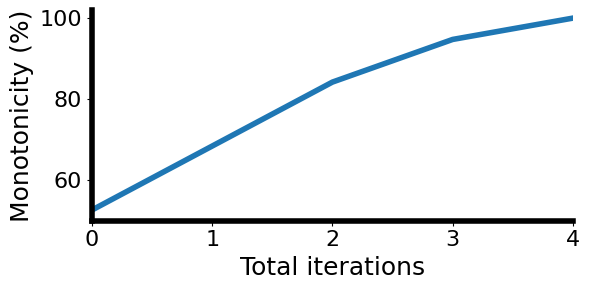

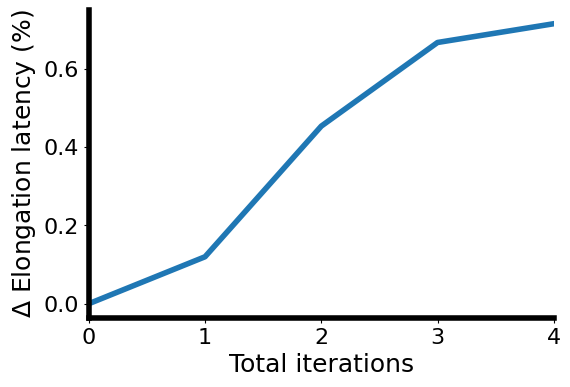

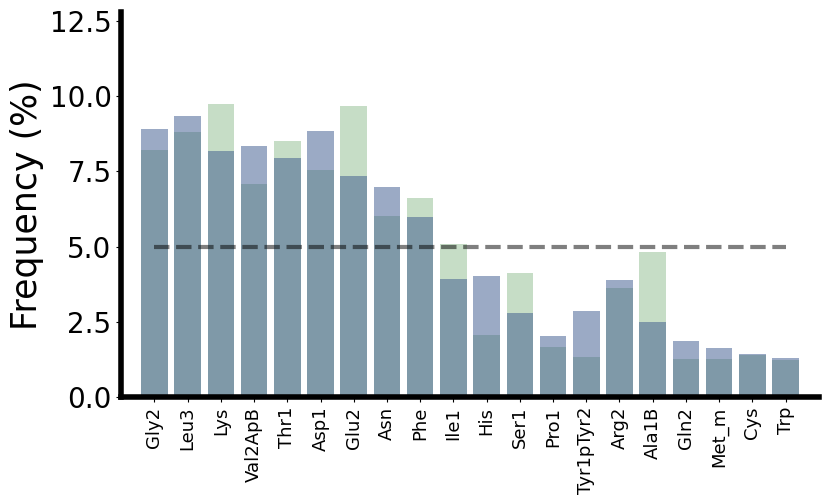

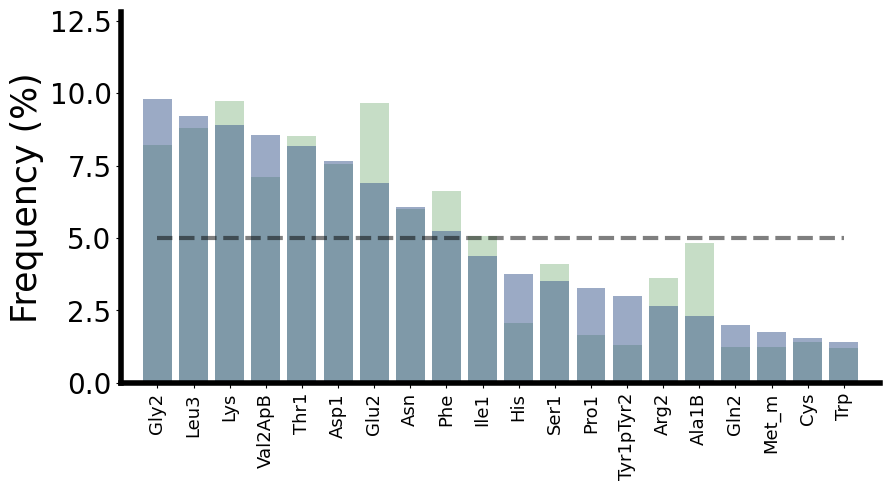

In [47]:
ptRNA_perturb=np.load('./data/RED20GFP-IterativeSequentialAdditive-Monotonicity_n10m300_ptRNA_perturb.npy')
elongt_perturb=np.load('./data/RED20GFP-IterativeSequentialAdditive-Monotonicity_n10m300_elongt_perturb.npy')
baseline_elongt = np.load('./data/RED20GFP-SinglePerturb_n10m300_baseline_elongt.npy')
mono_perturb=np.load('./data/RED20GFP-IterativeSequentialAdditive-Monotonicity_n10m300_mono_perturb.npy')

fig,ax = plt.subplots(figsize=(6,3))

ax.plot(np.arange(len(mono_perturb)),mono_perturb,linewidth=4)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

ax.set_ylabel('Monotonicity (%)',fontsize=18)
ax.set_xlabel('Total iterations',fontsize=18)

ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.set_ylim(50,102)
ax.set_xlim(0,len(mono_perturb)-1)
ax.set_xticks([0,1,2,3,4])

plt.tight_layout()
fig.savefig('./Figures/S13F.svg', dpi=300,bbox_inches='tight')

#Elongation latency % plot
fig,ax = plt.subplots(figsize=(6,4))
ax.plot(np.arange(len(elongt_perturb)),(elongt_perturb-baseline_elongt)/baseline_elongt*100,linewidth=4)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(0,len(elongt_perturb)-1)
ax.set_xticks([0,1,2,3,4])

ax.set_ylabel('$\Delta$ Elongation latency (%)',fontsize=18)
ax.set_xlabel('Total iterations',fontsize=18)

ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='x', which='major', labelsize=16)
fig.savefig('./Figures/S13G.svg', dpi=300,bbox_inches='tight')


#Plot iter 0 and final:
#Resort ptRNA_min and plot
GA_fast_values = np.array(list(e['GFP_gafast'][1].values()))
ptRNA_min_dict = dict(zip(tRNA_tags,GA_fast_values))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]

fig,ax = plt.subplots(figsize=(9,5))
ax.bar(np.arange(20),np.array(ptRNA_min_sorted)[0:20]*100,color='darkseagreen',width=0.8,alpha=0.5)
ax.bar(np.arange(20),np.array(ptRNA_perturb[0])*100,color='#39568CFF',width=0.8,alpha=0.5)
ax.plot(np.arange(20),[1/20*100]*20,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(20), np.array(tRNA_sorted)[0:20],rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-1,20)
ax.set_ylabel('Frequency (%)',fontsize=25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=13)
ax.set_ylim(0,12.8)

fig,ax = plt.subplots(figsize=(9,5))
ax.bar(np.arange(20),np.array(ptRNA_min_sorted)[0:20]*100,color='darkseagreen',width=0.8,alpha=0.5)
ax.bar(np.arange(20),np.array(ptRNA_perturb[-1])*100,color='#39568CFF',width=0.8,alpha=0.5)
ax.plot(np.arange(20),[1/20*100]*20,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(20), np.array(tRNA_sorted)[0:20],rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-1,20)
ax.set_ylabel('Frequency (%)',fontsize=25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=13)
ax.set_ylim(0,12.8)

plt.tight_layout()
fig.savefig('./Figures/S13e.svg', dpi=300,bbox_inches='tight')

/Users/akshay/Library/Python/3.9/lib/python/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


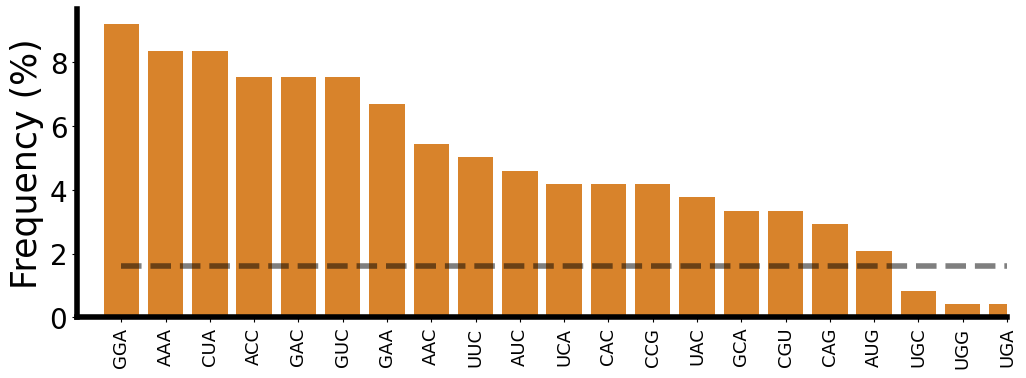

In [19]:
tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

gene_map, pCodon_GFP = singlegene_to_genemap('./data/tables/sfGFP_RED20.csv')
ptRNA_red20 = pd.read_excel('./data/tables/tRNAValues_RED20.xlsx',header=None)
ptRNA_red20 = ptRNA_red20[6]/sum(ptRNA_red20[6])
ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(ptRNA_red20,pCodon_GFP,extra2=True)

#Red20_codontable = pd.read_excel('./data/tables/codonValues_RED20.xlsx',header=None)
#Red20_pCodon = Red20_codontable[6]/sum(Red20_codontable[6])
#Red20_codon_dict = dict(zip(Red20_codontable[9],Red20_codontable[11]))
#Red20_pCodon_dict = dict(zip(Red20_codontable[9],Red20_pCodon))
fig,ax = plt.subplots(figsize=(12,4))

##Compute the codon distribution and elongation latency of each gene weighted by transcript number
#codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
#gene_map, gene_latency = compute_gene_elongt(codon_elongt)
#pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)

#Compute cognate distributions and sort codons by frequency
#ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,extra2=True)

codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]
for i,codon in enumerate(codon_sorted):
    pCodon_sorted[i] = pcodon_dict[codon]

ax.bar(np.arange(62),np.array(pCodon_sorted)*100,color='#d8832b',width=0.8)
ax.plot(np.arange(62),[1/62*100]*62,color='black',linewidth=4,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(codon_tags)), codon_sorted,rotation='vertical')
ax.set_xlim(-1,20)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=13)
    ax.set_ylabel('Frequency (%)',fontsize=25)
    
fig.savefig('./Figures/S13b.svg', dpi=300,bbox_inches='tight')

# Extra

In [80]:
def perturb_one(ptRNA,tRNA,tRNA_sorted, pCodon,ensmbl_latency_dict,pos,delta,skip=False,flip=False):
    #Delta is not taken into the account in this function (hard coded as 0.1)
    
    ptRNA_red20 = np.array([0.07175573, 0.        , 0.09770992, 0.        , 0.        ,
       0.        , 0.02137405, 0.04427481, 0.02137405, 0.        ,
       0.03053435, 0.08549618, 0.10534351, 0.        , 0.01221374,
       0.07175573, 0.        , 0.        , 0.12824427, 0.        ,
       0.        , 0.03053435, 0.01374046, 0.01526718, 0.0259542 ,
       0.        , 0.        , 0.        , 0.05496183, 0.        ,
       0.        , 0.        , 0.04732824, 0.        , 0.        ,
       0.        , 0.01526718, 0.02748092, 0.        , 0.07938931])
    ptRNA_maxval = max(np.array(ptRNA_red20)[np.nonzero(np.array(ptRNA_red20))])
    ptRNA_minval = min(np.array(ptRNA_red20)[np.nonzero(np.array(ptRNA_red20))])
    ptRNA_dict = dict(zip(tRNA, ptRNA))
    tRNA_1 = tRNA_sorted[pos]
    tRNA_0 = tRNA_sorted[pos-1]
    if flip:
        tRNA_0 = tRNA_sorted[pos]
        tRNA_1 = tRNA_sorted[pos-1]
    
    elongation_arr = []
    tRNA0_vals = []
    tRNA1_vals = []
    
    N=100
    while ptRNA_dict[tRNA_0]<ptRNA_maxval and ptRNA_dict[tRNA_1]>ptRNA_minval:
        tRNA0_vals.append(ptRNA_dict[tRNA_0])
        tRNA1_vals.append(ptRNA_dict[tRNA_1])
        arr = []
        for i in range(N):
            arr.append(computeElongationLatency(np.array(list(ptRNA_dict.values())), pCodon, ensmbl_latency_dict)[0][0])
        elongation_arr.append(np.average(arr))
        print(ptRNA_dict[tRNA_0],ptRNA_dict[tRNA_1])
        ptRNA_dict[tRNA_0] += 0.005
        ptRNA_dict[tRNA_1] -= 0.005
        
    return elongation_arr, tRNA0_vals, tRNA1_vals
    

In [81]:
# Single perturbation analysis of each of the 20 tRNA
single_perturb = perturb_one(GA_fast_values, tRNA_tags, np.array(tRNA_sorted)[0:20],pCodon,ensmbl_latency_dict,1,1)
single_perturb

0.08207273693853659 0.08796342374035546
0.0870727369385366 0.08296342374035545
0.0920727369385366 0.07796342374035545
0.0970727369385366 0.07296342374035544
0.1020727369385366 0.06796342374035544
0.10707273693853661 0.06296342374035543
0.11207273693853662 0.05796342374035544
0.11707273693853662 0.05296342374035544
0.12207273693853662 0.04796342374035544
0.12707273693853663 0.042963423740355444


([159.96720568942442,
  160.1112084479503,
  160.0146125847393,
  160.17143752061367,
  160.37953164192882,
  160.4705552977614,
  160.7713233311518,
  161.03165671272922,
  161.59562299129425,
  162.07969337318045],
 [0.08207273693853659,
  0.0870727369385366,
  0.0920727369385366,
  0.0970727369385366,
  0.1020727369385366,
  0.10707273693853661,
  0.11207273693853662,
  0.11707273693853662,
  0.12207273693853662,
  0.12707273693853663],
 [0.08796342374035546,
  0.08296342374035545,
  0.07796342374035545,
  0.07296342374035544,
  0.06796342374035544,
  0.06296342374035543,
  0.05796342374035544,
  0.05296342374035544,
  0.04796342374035544,
  0.042963423740355444])

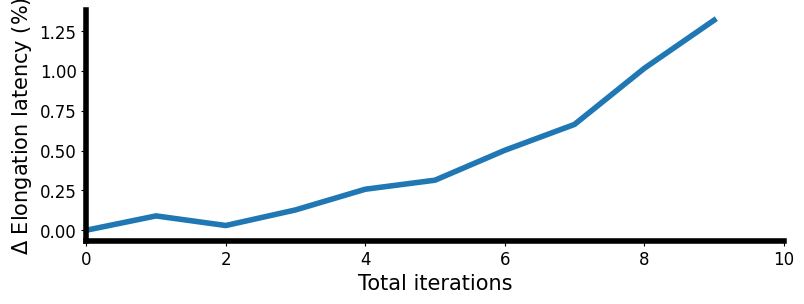

In [82]:
#plt.plot(range(len(single_perturb[0])),single_perturb[0])

fig,ax = plt.subplots(figsize=(9,3))
ax.plot(np.arange(len(np.array(single_perturb[0]))),(np.array(single_perturb[0])-np.array(single_perturb[0])[0])/np.array(single_perturb[0])[0]*100,linewidth=4)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(0,len(np.array(single_perturb[0])))


ax.set_ylabel('$\Delta$ Elongation latency (%)',fontsize=15)
ax.set_xlabel('Total iterations',fontsize=15)

ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=12)

In [83]:
# Single perturbation analysis of each of the 20 tRNA
single_perturb = perturb_one(GA_fast_values, tRNA_tags, np.array(tRNA_sorted)[0:20],pCodon,ensmbl_latency_dict,1,1,flip=True)
single_perturb

0.08796342374035546 0.08207273693853659
0.09296342374035546 0.07707273693853658
0.09796342374035547 0.07207273693853658
0.10296342374035547 0.06707273693853658
0.10796342374035547 0.06207273693853658
0.11296342374035548 0.05707273693853658
0.11796342374035548 0.05207273693853658
0.12296342374035549 0.047072736938536586
0.1279634237403555 0.04207273693853659


([160.01316647119674,
  160.2061468335266,
  160.4071021302561,
  160.79854143363147,
  160.86527337863575,
  161.3020912897854,
  161.85052461879712,
  162.23450561382313,
  162.94510946084944],
 [0.08796342374035546,
  0.09296342374035546,
  0.09796342374035547,
  0.10296342374035547,
  0.10796342374035547,
  0.11296342374035548,
  0.11796342374035548,
  0.12296342374035549,
  0.1279634237403555],
 [0.08207273693853659,
  0.07707273693853658,
  0.07207273693853658,
  0.06707273693853658,
  0.06207273693853658,
  0.05707273693853658,
  0.05207273693853658,
  0.047072736938536586,
  0.04207273693853659])

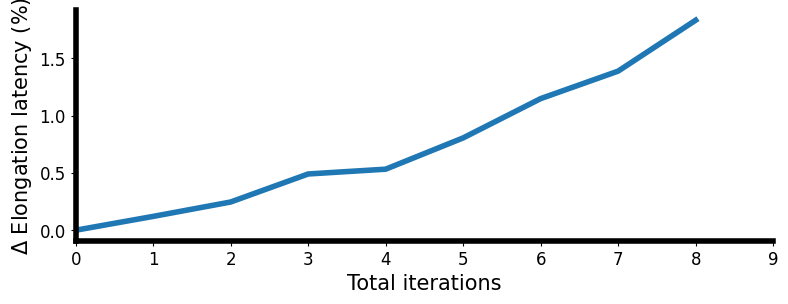

In [84]:
fig,ax = plt.subplots(figsize=(9,3))
ax.plot(np.arange(len(np.array(single_perturb[0]))),(np.array(single_perturb[0])-np.array(single_perturb[0])[0])/np.array(single_perturb[0])[0]*100,linewidth=4)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(0,len(np.array(single_perturb[0])))


ax.set_ylabel('$\Delta$ Elongation latency (%)',fontsize=15)
ax.set_xlabel('Total iterations',fontsize=15)

ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=12)